## Machine learning Part 1

#### This script contains the following

1. Importing libraries and data
2. Data cleaning
3. Data prep for regression analysis
4. Regression analysis

#### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Ensures that the graphs created are displayed within the notebook without the need to "call" them specifically.
%matplotlib inline

In [3]:
df = pd.read_csv(r'C:\Users\heidi\OneDrive\CareerFoundry\Achievement6 Sourcing Open Data\Exercise 6.4\Answers 6.4\Data\ufc-master-clean1.csv', index_col = False)

In [4]:
path = (r'C:\Users\heidi\OneDrive\CareerFoundry\Achievement6 Sourcing Open Data\Exercise 6.4')

#### 2. Data cleaning

In [5]:
df.columns

Index(['R_fighter', 'B_fighter', 'R_odds', 'B_odds', 'date', 'City',
       'State/Province', 'country', 'Winner', 'title_bout', 'weight_class',
       'gender', 'no_of_rounds', 'B_Stance', 'B_Height_cms', 'B_Reach_cms',
       'B_Weight_lbs', 'R_Stance', 'R_Height_cms', 'R_Reach_cms',
       'R_Weight_lbs', 'R_age', 'B_age', 'height_dif', 'reach_dif', 'age_dif',
       'Finish2', 'finish', 'finish_details', 'finish_round',
       'finish_round_time'],
      dtype='object')

In [6]:
df.head()

,R_fighter,B_fighter,R_odds,B_odds,date,City,State/Province,country,Winner,title_bout,...,R_age,B_age,height_dif,reach_dif,age_dif,Finish2,finish,finish_details,finish_round,finish_round_time
0,Anthony Pettis,Alex Morono,-210,175,12/19/2020,Las Vegas,Nevada,USA,Red,False,...,33,30,2.54,0.00,-3,U-DEC,U-DEC,NaN,3,5:00
1,Christos Giagos,Carlton Minus,-345,285,12/19/2020,Las Vegas,Nevada,USA,Red,False,...,30,27,0.00,10.16,-3,U-DEC,U-DEC,NaN,3,5:00
2,Deron Winn,Antonio Arroyo,160,-185,12/19/2020,Las Vegas,Nevada,USA,Red,False,...,31,31,22.86,7.62,0,U-DEC,U-DEC,NaN,3,5:00
3,Gillian Robertson,Taila Santos,-145,125,12/19/2020,Las Vegas,Nevada,USA,Blue,False,...,27,25,-2.54,-12.70,-2,U-DEC,U-DEC,NaN,3,5:00
4,Jimmy Flick,Cody Durden,-157,137,12/19/2020,Las Vegas,Nevada,USA,Red,False,...,30,29,0.00,-2.54,-1,SUB,SUB,Triangle choke,1,3:18


In [7]:
df.shape

(4515, 31)

#### Missing values

In [8]:
# Check for missing values
df.isnull().sum()
# The missing values in finish details are expected due to the nature of the data. 

R_fighter               0
B_fighter               0
R_odds                  0
B_odds                  0
date                    0
City                    0
State/Province          0
country                 0
Winner                  0
title_bout              0
weight_class            0
gender                  0
no_of_rounds            0
B_Stance                0
B_Height_cms            0
B_Reach_cms             0
B_Weight_lbs            0
R_Stance                0
R_Height_cms            0
R_Reach_cms             0
R_Weight_lbs            0
R_age                   0
B_age                   0
height_dif              0
reach_dif               0
age_dif                 0
Finish2                 0
finish                  0
finish_details       2229
finish_round            0
finish_round_time       0
dtype: int64

#### Duplicates check

In [9]:
dups = df.duplicated()

In [10]:
# No duplicates
dups.shape

(4515,)

#### Extreme values check

In [11]:
# Add calculated column indicating 'averages'
df["average_height"] = (df["B_Height_cms"] + df["R_Height_cms"])/2
df["average_age"] = (df['R_age'] +  df['B_age'])/2
df["average_reach"] = (df['B_Reach_cms'] +  df['R_Reach_cms'])/2
df["average_weight"] = (df['B_Weight_lbs'] +  df['R_Weight_lbs'])/2
df.head()

,R_fighter,B_fighter,R_odds,B_odds,date,City,State/Province,country,Winner,title_bout,...,age_dif,Finish2,finish,finish_details,finish_round,finish_round_time,average_height,average_age,average_reach,average_weight
0,Anthony Pettis,Alex Morono,-210,175,12/19/2020,Las Vegas,Nevada,USA,Red,False,...,-3,U-DEC,U-DEC,NaN,3,5:00,179.07,31.5,182.88,162.5
1,Christos Giagos,Carlton Minus,-345,285,12/19/2020,Las Vegas,Nevada,USA,Red,False,...,-3,U-DEC,U-DEC,NaN,3,5:00,177.80,28.5,185.42,162.5
2,Deron Winn,Antonio Arroyo,160,-185,12/19/2020,Las Vegas,Nevada,USA,Red,False,...,0,U-DEC,U-DEC,NaN,3,5:00,179.07,31.0,181.61,185.0
3,Gillian Robertson,Taila Santos,-145,125,12/19/2020,Las Vegas,Nevada,USA,Blue,False,...,-2,U-DEC,U-DEC,NaN,3,5:00,166.37,26.0,166.37,125.0
4,Jimmy Flick,Cody Durden,-157,137,12/19/2020,Las Vegas,Nevada,USA,Red,False,...,-1,SUB,SUB,Triangle choke,1,3:18,170.18,29.5,171.45,125.0


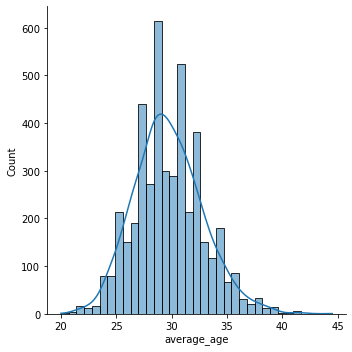

In [12]:
# Shows extreme values of average age
sns.displot(df['average_age'], kde = True, bins = 35)

In [13]:
# Check mean
df['average_age'].mean()

29.70919158361019

In [14]:
# Check median
df['average_age'].median()

29.5

In [15]:
# Check max
df['average_age'].max()

44.5

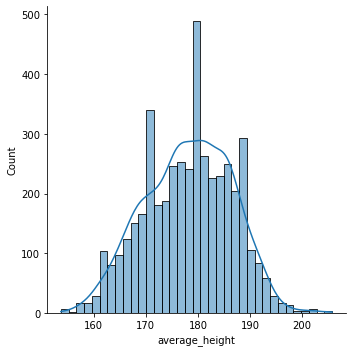

In [16]:
# Shows extreme values of average height
sns.displot(df['average_height'], kde = True, bins = 35)

In [17]:
df['average_height'].mean()

178.1324451827241

In [18]:
df['average_height'].median()

179.07

In [19]:
df['average_height'].max()

205.74

#### Hypothesis: Taller fighters have a longer reach.

#### 3. Data prep for regression analysis

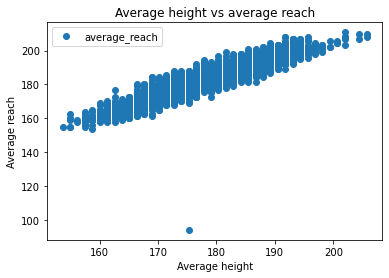

In [20]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
df.plot(x = 'average_height', y = 'average_reach', style = 'o')  # The style option creates a scatterplot; without it, we only have lines.
plt.title('Average height vs average reach')
plt.xlabel('Average height')
plt.ylabel('Average reach')
plt.show()

In [21]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df['average_height'].values.reshape(-1,1)
y = df['average_reach'].values.reshape(-1,1)

In [22]:
X

array([[179.07],
       [177.8 ],
       [179.07],
       ...,
       [173.99],
       [190.5 ],
       [177.8 ]])

In [23]:
y

array([[182.88],
       [185.42],
       [181.61],
       ...,
       [184.15],
       [194.31],
       [181.61]])

In [24]:
# Split the data into training set and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

#### 4. Regression analysis

In [25]:
# Create a regression object
regression = LinearRegression()

In [26]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [27]:
# OR Alternative code
# regression = LinearRegression().fit(X_train, y_train)

In [28]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

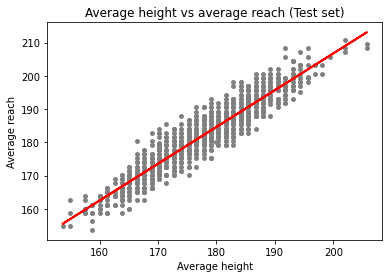

In [29]:
# Creating a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color = 'grey', s = 15)
plot_test.plot(X_test, y_predicted, color = 'red', linewidth = 2)
plot_test.title('Average height vs average reach (Test set)')
plot_test.xlabel('Average height')
plot_test.ylabel('Average reach')
plot_test.show()

In [30]:
# Create objects that contain the model summary statistics.
rmse =  mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [31]:
# Print the model summary statistics to evaluate the performance of the model.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.10600953]]
Mean squared error:  11.829960740973709
R2 score:  0.8865969083164382


In [32]:
y_predicted

array([[162.52015432],
       [180.78037169],
       [168.13868274],
       ...,
       [180.78037169],
       [169.54331484],
       [197.63595695]])

In [33]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,163.83,162.520154
1,180.34,180.780372
2,171.45,168.138683
3,187.96,190.612796
4,163.83,165.329419
5,162.56,166.734051
6,195.58,190.612796
7,191.77,184.994268
8,185.42,189.208164
9,180.34,184.994268


#### The relationship indicates a straight regression line which means it would be able to predict fairly accurately.

#### Compare how the regression fits the training set

In [34]:
# Predict
# This is predicts X_train
y_predicted_train = regression.predict(X_train) 

In [35]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [36]:
print('Slope:' ,regression.coef_) # Positive relationship between 'average height' and 'average reach'.  
print('Mean squared error: ', rmse) # A small MSE which means a good fit.
print('R2 score: ', r2) # Values are closer to 1 indicating a good fit.

Slope: [[1.10600953]]
Mean squared error:  14.279926241043727
R2 score:  0.852942923788925


#### Conclusion: The line is a good fit for the data.

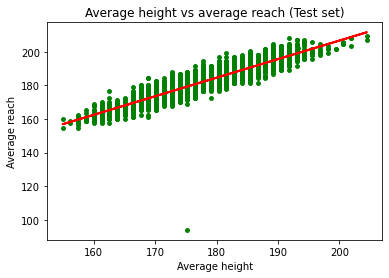

In [37]:
# Visualizing the training set results.
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =2)
plot_test.title('Average height vs average reach (Test set)')
plot_test.xlabel('Average height')
plot_test.ylabel('Average reach')
plot_test.show()

#### Bonus: performance improvement after removing outliers

In [38]:
# Clean the extreme values from the "Price per Unit" variable observed during the consistency checks.

df_test = df[df['average_reach'] <=211] 

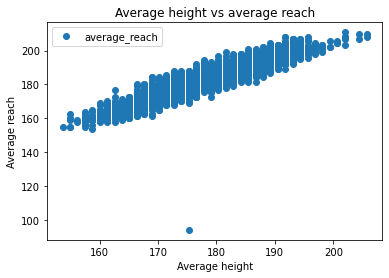

In [39]:
# See how the scatterplot looks without outliers.
df_test.plot(x = 'average_height', y='average_reach', style='o')  
plt.title('Average height vs average reach')  
plt.xlabel('Average height')  
plt.ylabel('Average reach')  
plt.show()

In [40]:
# Reshape again.
X_2 = df_test['average_height'].values.reshape(-1,1)
y_2 = df_test['average_reach'].values.reshape(-1,1)

In [41]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [42]:
# Run and fit the regression.
regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [43]:
# Predict.
y_predicted_2 = regression.predict(X_test_2)

In [44]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [45]:
print('Slope:' ,regression.coef_) # Positive relationship between 'average height' and 'average reach'
print('Mean squared error: ', rmse) # A small MSE which means a good fit.
print('R2 score: ', r2) # Values are closer to 1 indicating a good fit.

Slope: [[1.10600953]]
Mean squared error:  11.829960740973709
R2 score:  0.8865969083164382


#### Conclusion: The line is a good fit for the data.

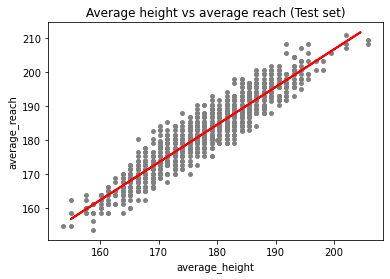

In [46]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_train, regression.predict(X_train), color='red', linewidth = 2)
plot_test.title('Average height vs average reach (Test set)')
plot_test.xlabel('average_height')
plot_test.ylabel('average_reach')
plot_test.show()

In [47]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})

data.head(25)

,Actual,Predicted
0,163.83,162.520154
1,180.34,180.780372
2,171.45,168.138683
3,187.96,190.612796
4,163.83,165.329419
5,162.56,166.734051
6,195.58,190.612796
7,191.77,184.994268
8,185.42,189.208164
9,180.34,184.994268


#### The relationship follows a straight regression line which means it would be able to predict fairly accurately.